# Avocado Market - Time Series Regression

### by ReDay Zarra

This project utilizes **Facebook Prophet** to analyze time series data for avocados from this dataset. The data includes observation dates, average unit price, unit type, region, volume and more. This time series data will then be used to **predict the prices for avocados** at any given date. This project showcases a 
step-by-step implementation of the model as well as in-depth notes to customize the 
model further for higher accuracy.

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

> Pandas is a library used for data frame manipulations. NumPy is a package used for numerical analysis. Matplotlib and Seaborn are used for data visualization. Random will be used to generate random values. Facebook 

## Importing the dataset

Importing the dataset with the .read_csv method from Pandas to load the dataset and storing it in the avocado_df variable. We can take a glimpse at the dataset with the built-in Pandas methods.

In [2]:
avocado_df = pd.read_csv('avocado.csv')

In [3]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Visualizing the dataset

In [4]:
avocado_df = avocado_df.sort_values("Date")

> Using the .sort_values to **sort the dataframe** from the values of the Date column

<Figure size 1500x1500 with 0 Axes>

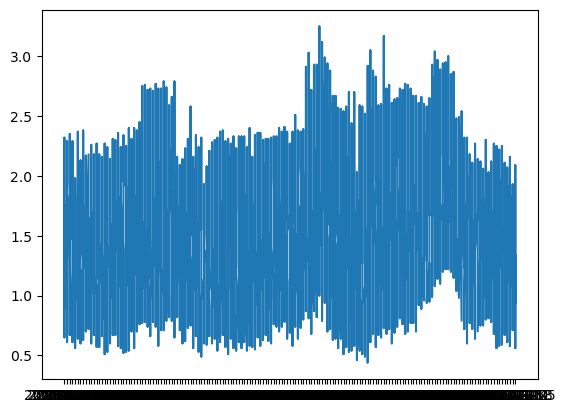

<Figure size 1500x1500 with 0 Axes>

In [5]:
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])
plt.figure(figsize = (15, 15))

<AxesSubplot:xlabel='region', ylabel='count'>

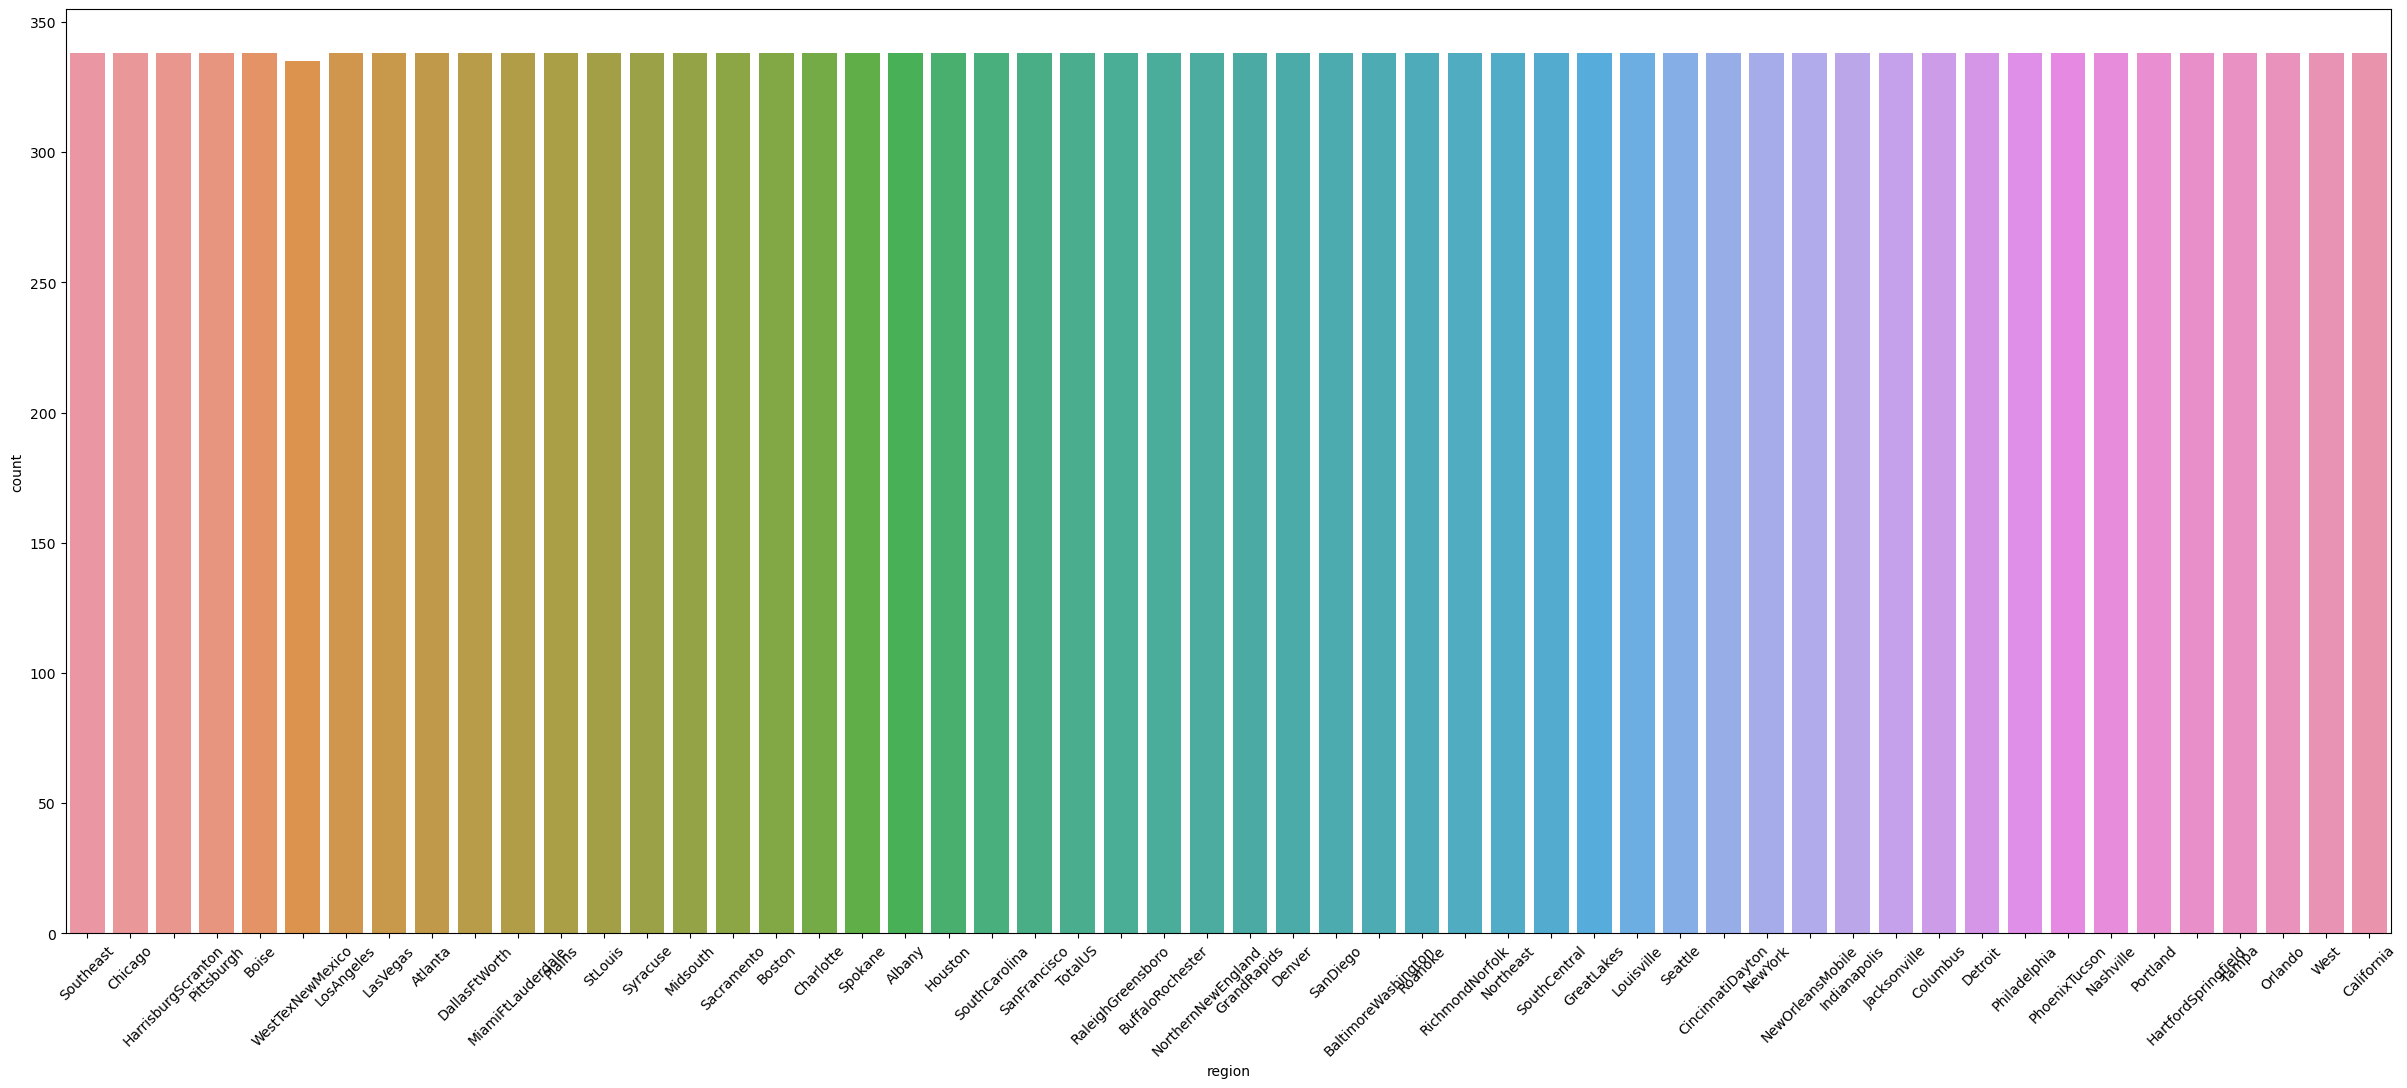

In [6]:
plt.figure(figsize = (30, 12))
plt.xticks(rotation = 45)
sns.countplot(x = 'region', data = avocado_df)

<AxesSubplot:xlabel='year', ylabel='count'>

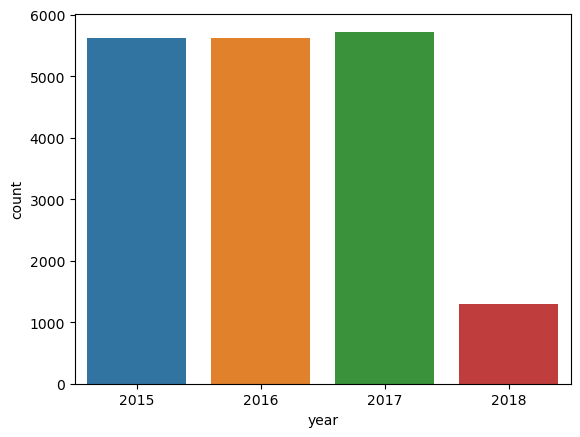

In [7]:
sns.countplot(x = 'year', data = avocado_df)

In [8]:
df_prophet = avocado_df[['Date', 'AveragePrice']]

In [9]:
df_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


## Time Series Regression

In [10]:
df_prophet = df_prophet.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [11]:
p = Prophet()

In [12]:
p.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [13]:
wanted = p.make_future_dataframe(periods = 365)
forecast = p.predict(wanted)

C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496718,0.922038,1.864837,1.496718,1.496718,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,0.0,0.0,0.0,1.383920
1,2015-01-11,1.491718,0.904773,1.869690,1.491718,1.491718,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,0.0,0.0,0.0,1.387427
2,2015-01-18,1.486719,0.901042,1.877133,1.486719,1.486719,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,0.0,0.0,0.0,1.382728
3,2015-01-25,1.481720,0.842340,1.837348,1.481720,1.481720,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,0.0,0.0,0.0,1.358678
4,2015-02-01,1.476721,0.820948,1.802281,1.476721,1.476721,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,0.0,0.0,0.0,1.325199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164538,0.569336,1.576155,0.986541,1.348076,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,0.0,0.0,0.0,1.078120
530,2019-03-22,1.163813,0.550989,1.624038,0.985552,1.347810,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,0.0,0.0,0.0,1.079065
531,2019-03-23,1.163088,0.556868,1.604774,0.984591,1.347545,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,0.0,0.0,0.0,1.080283
532,2019-03-24,1.162363,0.524812,1.607308,0.983630,1.347279,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,0.0,0.0,0.0,1.081756


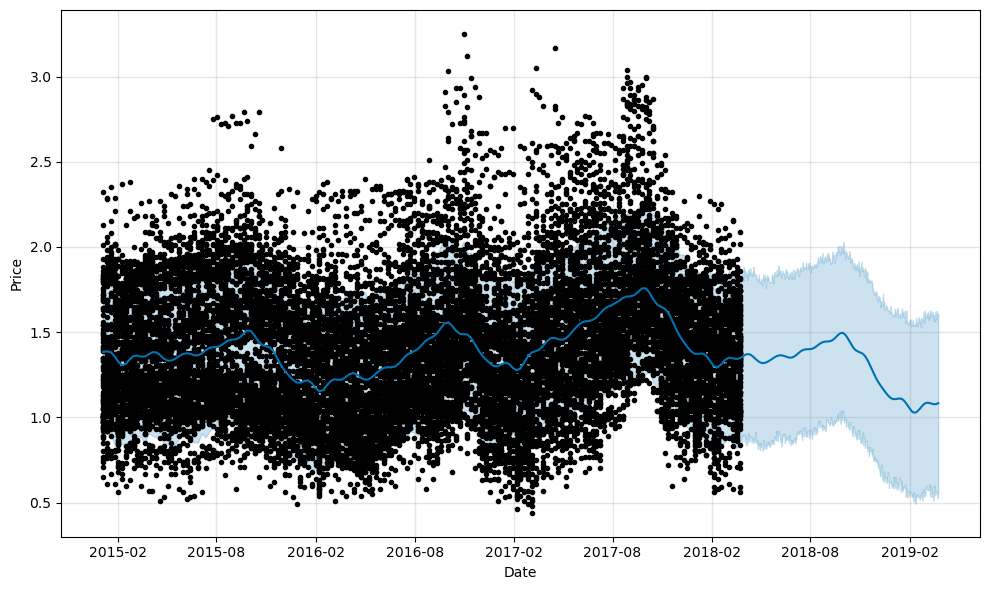

In [15]:
figure = p.plot(forecast, xlabel = 'Date', ylabel = 'Price')

C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


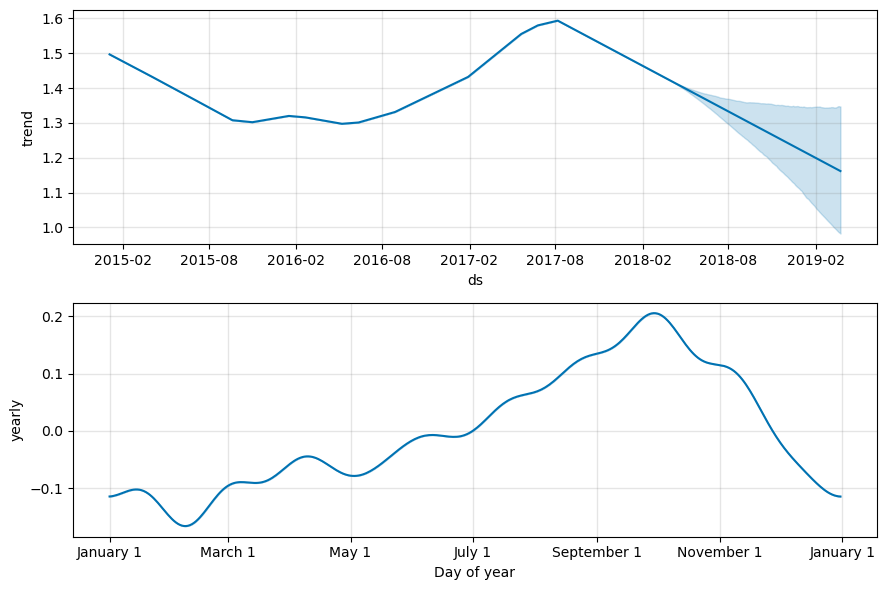

In [16]:
figure = p.plot_components(forecast)

## Region Based - Time Series Regression

In [17]:
df_prophet = pd.read_csv('avocado.csv')

In [18]:
df_prophet.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [19]:
df_prophet_region = df_prophet[df_prophet['region'] == 'West']

In [20]:
df_prophet_region = df_prophet_region.sort_values("Date")

In [21]:
df_prophet_region.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


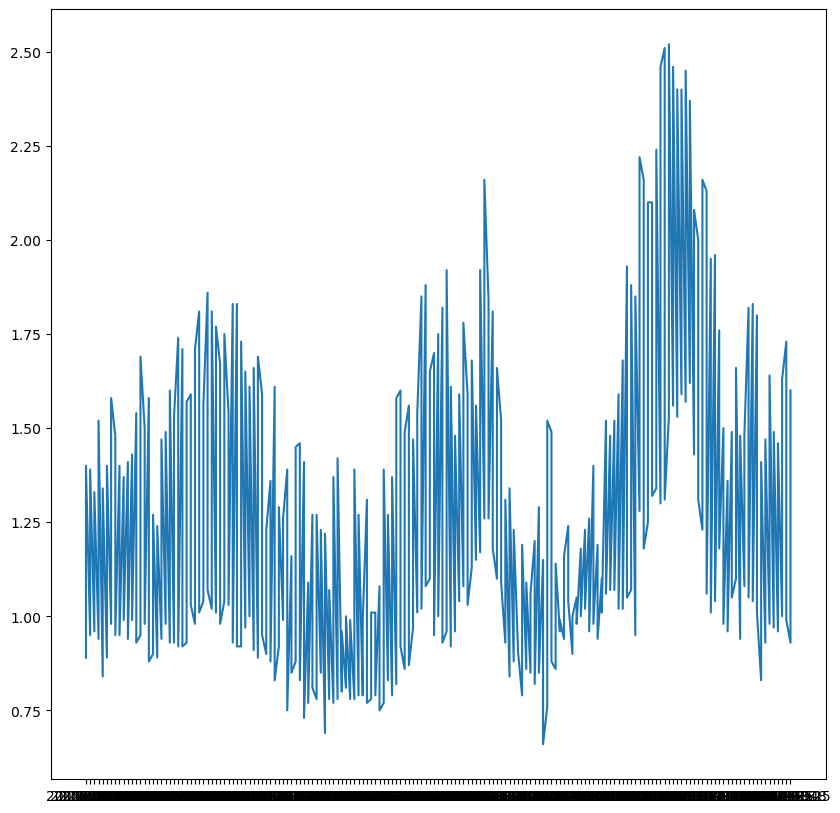

In [22]:
plt.figure(figsize = (10, 10))
plt.plot(df_prophet_region['Date'], df_prophet_region['AveragePrice'])

In [23]:
df_prophet_region = df_prophet_region[['Date', 'AveragePrice']]

In [24]:
df_prophet_region = df_prophet_region.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [25]:
df_prophet_region.head()

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
